# PROSPER personal loans analysis
## by Mohammed Gameel Rashad

## Investigation Overview

>This presentation will be divided into three parts.
- Part one: general analysis of the characteristics of loans on prosper site. 
- Part two: Borrower point of view, I will discuss the best loan properties for the borrower. 
- Part three: Lender point of view, I will discuss the best loan properties for lender to invest in .

## Dataset Overview

>data set contains loans from Prosper loan site witn many features such as  loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Features overview
Here is a brief explanation of the features used in this presentation :
- **LoanStatus:**The current status of the loan.
- **BorrowerAPR:**The Borrower's Annual Percentage Rate (APR) for the loan.
- **LenderYield:**The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- **ProsperScore:**A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
- **ListingCategory:**The category of the listing that the borrower selected when posting their listing.
- **BorrowerState:**The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- **IncomeRange:**The income range of the borrower at the time the listing was created.
- **LoanOriginalAmount:**The origination amount of the loan.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
#loading data set  and filtering columns
df = pd.read_csv('prosperLoanData.csv')
df= df[['Investors','InvestmentFromFriendsAmount','InvestmentFromFriendsCount','Recommendations','PercentFunded','MonthlyLoanPayment','LoanOriginationDate','LoanOriginalAmount','OnTimeProsperPayments','TotalProsperPaymentsBilled','TotalProsperLoans','StatedMonthlyIncome','IncomeVerifiable','IncomeRange','IsBorrowerHomeowner','EmploymentStatusDuration','EmploymentStatus','Occupation','BorrowerState',r'ListingCategory (numeric)','ProsperScore','LenderYield','BorrowerAPR','ClosedDate','LoanStatus','Term']]

#correct some data types
df.ClosedDate = df.ClosedDate.astype('datetime64')
df.LoanOriginationDate= df.LoanOriginationDate.astype('datetime64')

#removing  outliers
df = df[df.ProsperScore != 11]


# filter main df
loan_status_data = df[df.LoanStatus.isin(['Defaulted','Chargedoff','Completed'])]
# turn income range into ordered categorical datatype
income_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',
         '$75,000-99,999','$100,000+']
income_order_cat = pd.api.types.CategoricalDtype(ordered=True,categories = income_order )
loan_status_data['IncomeRange'] = loan_status_data['IncomeRange'].astype(income_order_cat)



# Part one: General analysis
## a - the number of loans in each category

>The main loan reason is debt consolidation which is a form of debt refinancing that entails taking out one loan to pay off many others. Loans lead to more loans. The next high categories are home improvement and business.

> It looks like Prosper did the same analysis as we did.the top most categories(debt consolidation - home improvement )appear in the same order in the loan type list on [their site](https://www.prosper.com/plp/loans/loan-types/)

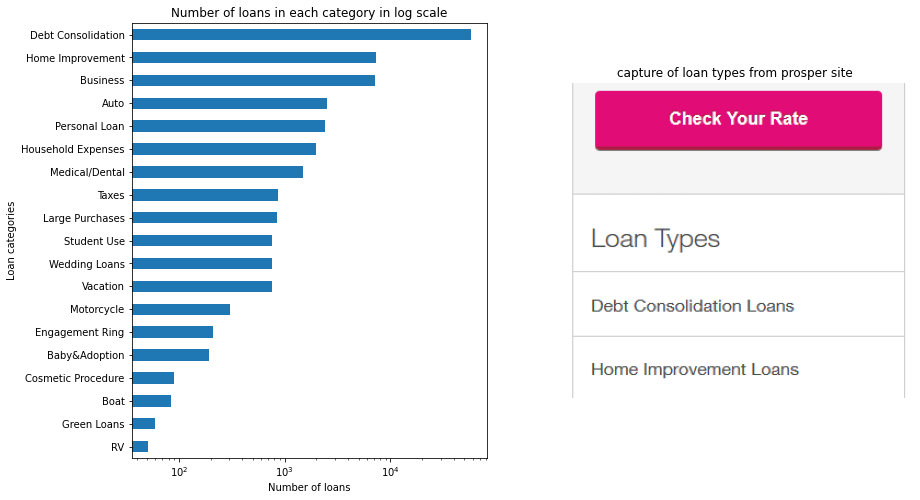

In [11]:
#mapper that connect number with its category
cat_mapper ={ 0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

cat_count = df['ListingCategory (numeric)'].value_counts()
cat_count.index = pd.Series(cat_count.index).replace(cat_mapper)
cat_count = cat_count.sort_values(ascending=True)
#filtering unknown categories
cat_count =cat_count[~cat_count.index.isin(['Not Available','Other'])]
plt.figure(figsize=(14,8));
plt.subplot(1,2,1)
cat_count.plot(kind="barh");
plt.xscale('log');
plt.title('Number of loans in each category in log scale');
plt.ylabel("Loan categories")
plt.xlabel("Number of loans")
plt.subplot(1,2,2)
image = mpimg.imread("Capture.PNG")
plt.axis("off")
plt.imshow(image)
plt.title("capture of loan types from prosper site");

# Part one: General analysis
## b - the number of loans in each state
>most of the loans come from California - may be because prosper headquarters is there - followed by Texas and new York.

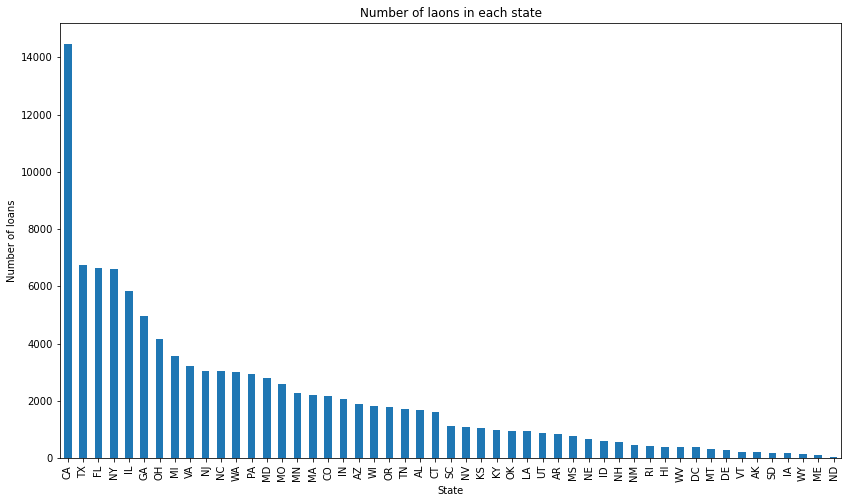

In [12]:
plt.figure(figsize=(14,8));
df.BorrowerState.value_counts().plot(kind ='bar');
plt.xlabel("State")
plt.ylabel("Number of loans");
plt.title("Number of laons in each state");

# Part one: General analysis
## c - average loan amount for each income range
>The following graph shows the average loan amount for each income range. The amount of loan increases with the increase of income.


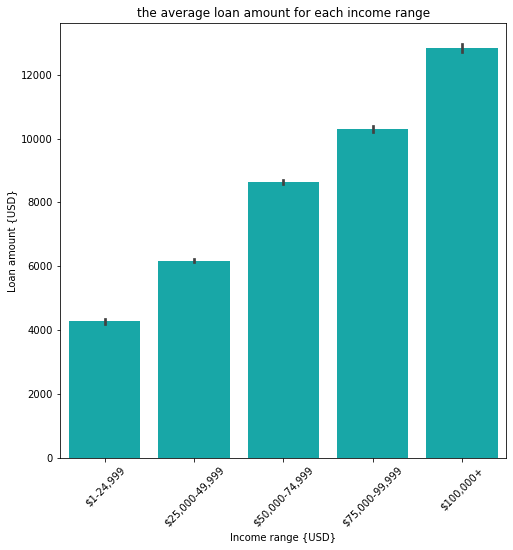

In [13]:
plt.figure(figsize=(8,8))
sns.barplot(data = df , x="IncomeRange" , y="LoanOriginalAmount",color = "c",
           order = ['$1-24,999','$25,000-49,999','$50,000-74,999',
         '$75,000-99,999','$100,000+'])
plt.xticks(rotation=45);
plt.ylabel("Loan amount {USD}");
plt.xlabel("Income range {USD}");
plt.title("the average loan amount for each income range");

# Part two: Borrower point of view
>Completed loans are associated with low APR for all income ranges. Defaulted loans have higher APR. Charged off loans have the highest APR. So, for the borrower to complete the loan he is advised to choose low APR loans. The graph can also be used to determine the suitable APR for each income range. It is also noticed that Prosper offers lower APR for high loan amount (high income range)

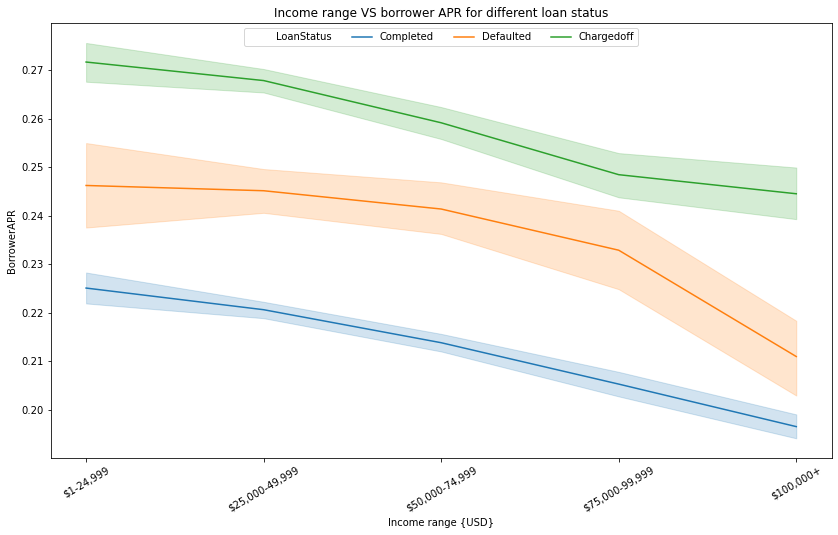

In [14]:
plt.figure(figsize=(14,8))
# filter unknown income
plot_data = loan_status_data[~loan_status_data['IncomeRange'].isin(['Not displayed','Not employed','$0'])]
sns.lineplot(data = plot_data , x= "IncomeRange" , y= 'BorrowerAPR',hue = "LoanStatus" )
plt.xticks(rotation = 30)
plt.legend(loc = 9 , ncol=4)
plt.xlabel("Income range {USD}")
plt.title("Income range VS borrower APR for different loan status");

# Part three: Lender point of view
>Low prosper scores are associated with higher lender yield but they also have high risk to be charged off or defaulted. However, high prosper scores have low lender yield but it has low risk and higher chance to be completed. So the Lender or the investor has to decide between low prosper score (high risk but high revenue) and high prosper score (low risk but low revenue). 

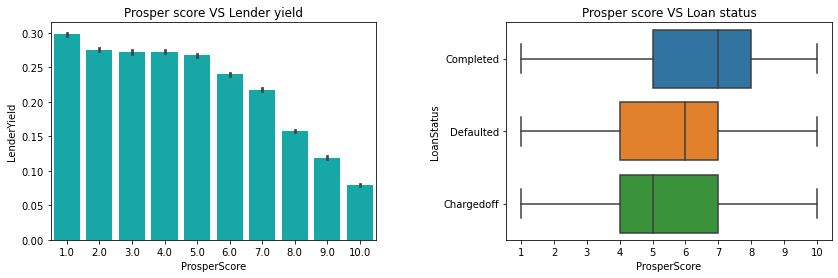

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.barplot(data = loan_status_data , x = 'ProsperScore', y= 'LenderYield',color='c'  )
plt.title("Prosper score VS Lender yield")
plt.subplot(1,2,2)
sns.boxplot(data=loan_status_data,y='LoanStatus' , x='ProsperScore')
plt.xticks(np.arange(1,11,1),np.arange(1,11,1))
plt.title("Prosper score VS Loan status")
plt.subplots_adjust(wspace = 0.4 )


# Thanks